In [15]:
%matplotlib inline
import pandas as pd
import altair as alt
import numpy as np
from vega_datasets import data
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

# Horizon Graphs

In [16]:
source = pd.DataFrame([
    {"x": 1,  "y": 20}, {"x": 2,  "y": 54},
    {"x": 3,  "y": 63}, {"x": 4,  "y": 71},
    {"x": 5,  "y": 85}, {"x": 6,  "y": 73},
    {"x": 7,  "y": 59}, {"x": 8,  "y": 87},
    {"x": 9,  "y": 62}, {"x": 10, "y": 88},
    {"x": 11, "y": 84}, {"x": 12, "y": 47},
    {"x": 13, "y": 37}, {"x": 14, "y": 76},
    {"x": 15, "y": 47}, {"x": 16, "y": 57},
    {"x": 17, "y": 68}, {"x": 18, "y": 26},
    {"x": 19, "y": 42}, {"x": 20, "y": 55}
])

In [17]:
source

,x,y
0,1,20
1,2,54
2,3,63
3,4,71
4,5,85
5,6,73
6,7,59
7,8,87
8,9,62
9,10,88


In [18]:
area1 = alt.Chart(source).mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('x', scale=alt.Scale(zero=False, nice=False)),
    alt.Y('y', scale=alt.Scale(domain=[0, 50]), 
          axis=alt.Axis(title='y')),
    opacity=alt.value(0.6)
).properties(
    width=500,
    height=75
)

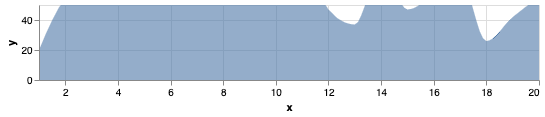

In [20]:
area1

In [21]:
area2 = area1.encode(
    alt.Y('ny:Q', scale=alt.Scale(domain=[0, 50]))
).transform_calculate(
    "ny", alt.datum.y - 50
)

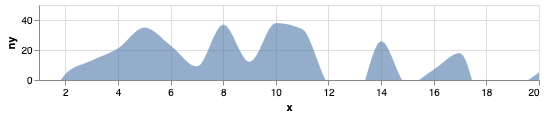

In [22]:
area2

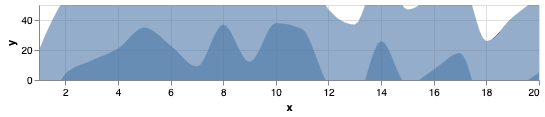

In [23]:
area1 + area2

# Layered Area Chart

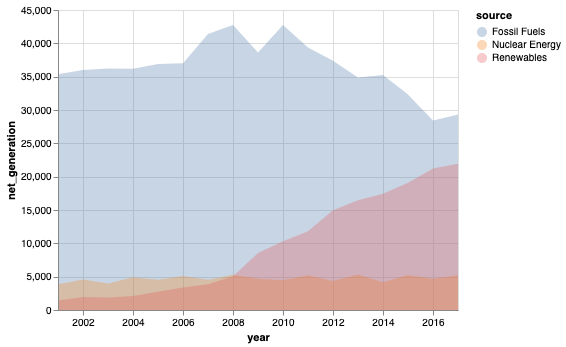

In [25]:
source = data.iowa_electricity()

alt.Chart(source).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)

# Horizontal Normalized Stacked Area Chart

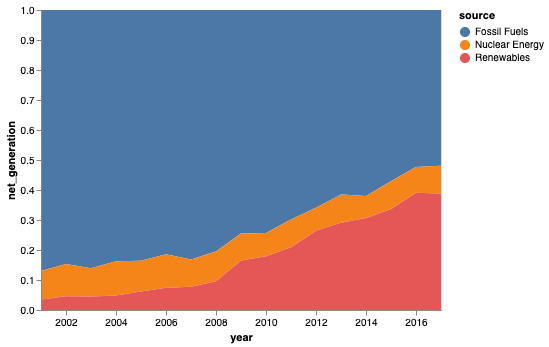

In [27]:
alt.Chart(source).mark_area().encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack="normalize"),
    color="source:N"
)

# Trellis Area Chart

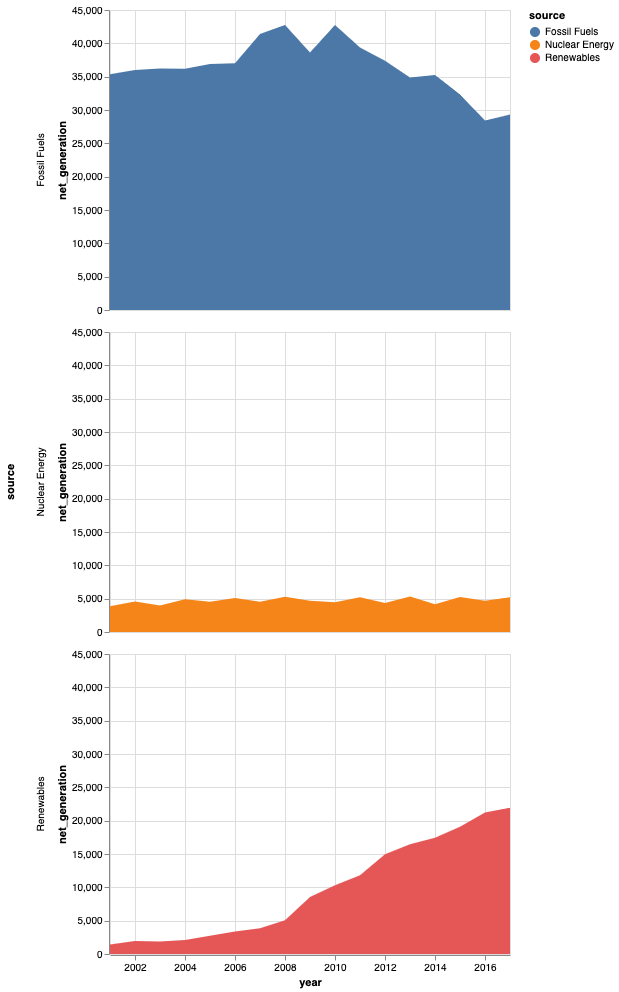

In [29]:
alt.Chart(source).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N",
    row="source:N"
)

# Streamgraph

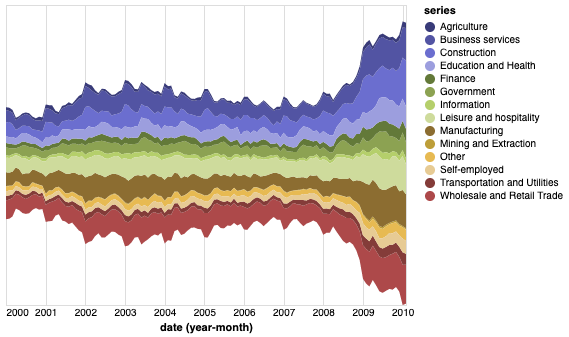

In [30]:
source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', 
                      domain=False, 
                      tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

# Trellis Area Sort Chart

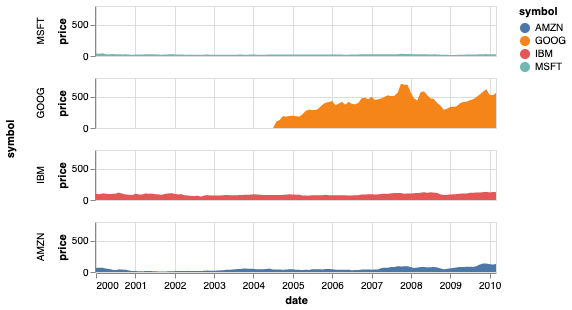

In [32]:
source = data.stocks()

alt.Chart(source).transform_filter(
    alt.datum.symbol != 'AAPL'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N', 
                sort=['MSFT', 'GOOG', 'IBM', 'AMZN'])
).properties(height=50, width=400)